In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import colors
import numpy as np
from scipy.misc import imread
%matplotlib inline

In [2]:
# CC0 image:
# https://pixabay.com/en/trees-silhouette-variety-309435/

In [3]:
def quad_mesh(ax, bx, ay, by, nx, ny, a, color, alpha):
    """
    plot a mesh on Omega = [ax, bx] x [ay, by]
    
    with axis a using color and alpha
    """
    from matplotlib.collections import LineCollection
    x = np.linspace(ax, bx, nx)
    y = np.linspace(ay, by, ny)
    lines = []
    for xx in x:
        lines.append([(xx, ay), (xx, by)])
    for yy in y:
        lines.append([(ax, yy), (bx, yy)])
    l = LineCollection(lines, lw=2, clip_on=False, color=[c/255.0 for c in color] + [alpha])
    
    a.set_xlim(ax, bx)
    a.set_ylim(ay, by)
    a.add_collection(l)

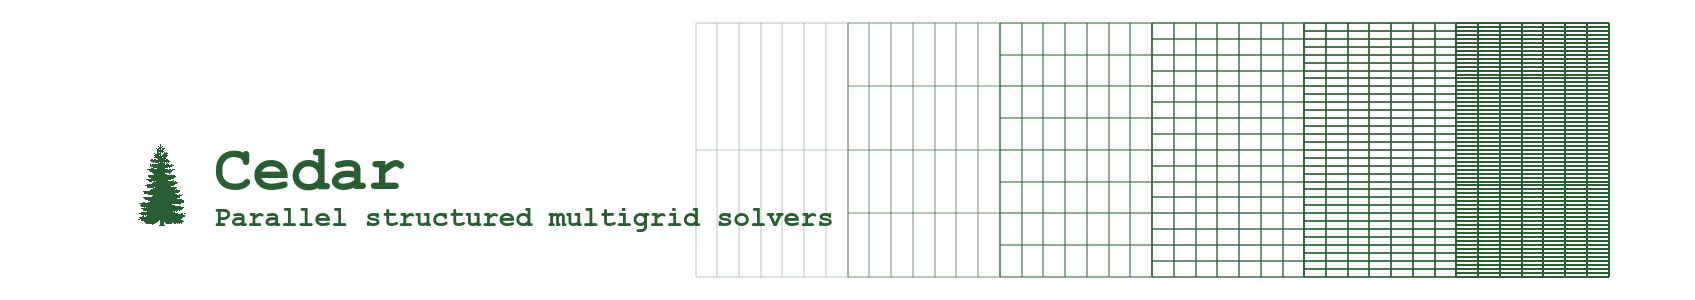

In [8]:
f, a = plt.subplots(figsize=(30,20))

if 0:
    # dark background
    figname = 'cedar-logo-dark'
    colorfg = [255,255,255]
    color = [43,93,52]
if 1:
    # light background
    figname = 'cedar-logo-light'
    color = [255,255,255]
    colorfg = [43,93,52]

colorhex = colors.rgb2hex([c/255.0 for c in color])
colorfghex = colors.rgb2hex([c/255.0 for c in colorfg])

# plot the background
bx = 600
by = 100
size=(0, bx, 0, by)
rect = patches.Rectangle([0,0], bx, by, color=colorhex, zorder=-10)
a.add_patch(rect)

# plot the grids
N = 6
for i in range(0,N+1):
    bs = 60
    quad_mesh(bx-(N+1)*bs+i*bs, bx-(N+1)*bs+(i+1)*bs, 0, by, 8, 2**i+1, a, colorfg, i/N)

# name
if 0:
    plt.text(50, 20, 'Cedar', fontsize=64, fontname='Courier New', color=colorfghex, fontweight='bold')

if 1:
    plt.text(50, 35, 'Cedar', fontsize=64, fontname='Courier New', color=colorfghex, fontweight='bold')
    plt.text(50, 20, 'Parallel structured multigrid solvers', fontsize=28, fontname='Courier New', color=colorfghex, fontweight='bold')

# image
img = imread('trees-309435.png')
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        v = img[i,j,:]
        if v[0] == v[1] == v[2] == 0:
            img[i,j,:3] = color
            img[i,j,3] = 255
        else:
            img[i,j,:3] = colorfg
            img[i,j,3] = 255
            
w = 20
plt.imshow(img, extent=(20, 20+w, 20, 20+w*img.shape[0]/img.shape[1]))

plt.axis('image')
plt.axis('off')

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.savefig(figname+'.png', dpi=300, bbox_inches='tight', pad_inches=0)

#### Just for debugging fonts vvvvvvvv

In [ ]:
import matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
for f in flist:
    try:
        name = matplotlib.font_manager.FontProperties(fname=f).get_name()
        if name == 'System Font':
            continue
        if '.SF' in name:
            continue
        print(name)
    except:
        pass
#names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]